In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DataScience/

/content/drive/MyDrive/DataScience


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline


In [4]:
red_wine= pd.read_excel('winequality-red.xlsx')
white_wine= pd.read_excel('winequality-white.xlsx')

In [5]:
#Şarap özelliklerini tiplerine göre ayarlama yapıyoruz.

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

#Şarap Kalite Puanlarını Niteliksel Kalite Etiketlerine Gruplandırma
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
                                                          if value <= 5 else 'medium'
                                                              if value <= 7  else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],categories=['low','medium','high'])

#Beyaz Şarap içinde aynısını yapıyoruz.
white_wine['quality_label'] = white_wine['quality'].apply(lambda value : 'low'
                                                             if value <= 5 else 'medium'
                                                              if value <= 7  else 'high')
white_wine['quality_label']=pd.Categorical(white_wine['quality_label'],categories = ['low','medium','high'])

#datasetlerini birleştirme işlemi
wines = pd.concat([red_wine,white_wine])

#veri noktalarını rastgele hale getirmek için kayıtları yeniden karıştırın
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)


In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [7]:
#İhtiyacımız olan öznitelikleri seçiyoruz.
subset_attributes = ['residual sugar','total sulfur dioxide', 'sulphates','alcohol','volatile acidity','quality']

rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs,ws],axis = 1, keys = ['Red Wine Statistics','White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

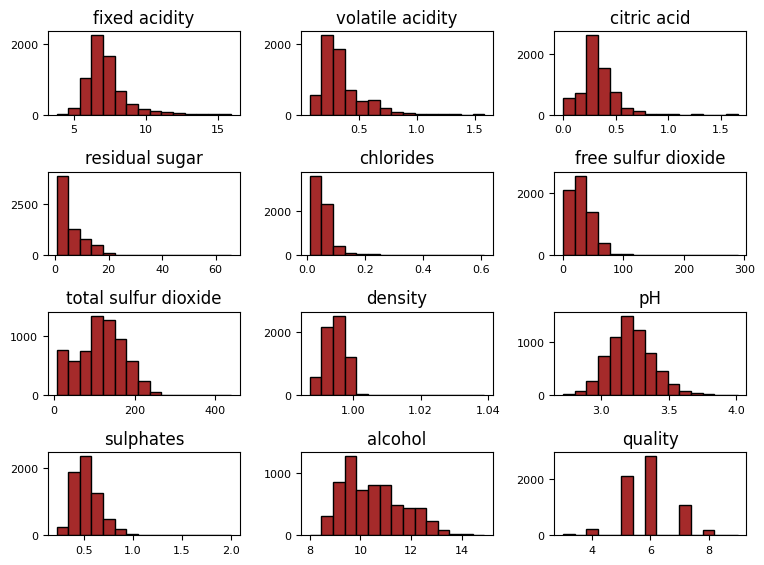

In [8]:
#Verileri Tek Boyutta Görselleştirme (1-D)

wines.hist(bins=15 , color = 'brown',edgecolor = 'black',linewidth= 1.0,
           xlabelsize = 8, ylabelsize= 8 , grid = False)

plt.tight_layout(rect = (0,0,1.2,1.2))

<ipython-input-9-3bfd662b0ed4>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='brown')


<Axes: xlabel='Sulphates', ylabel='Frequency'>

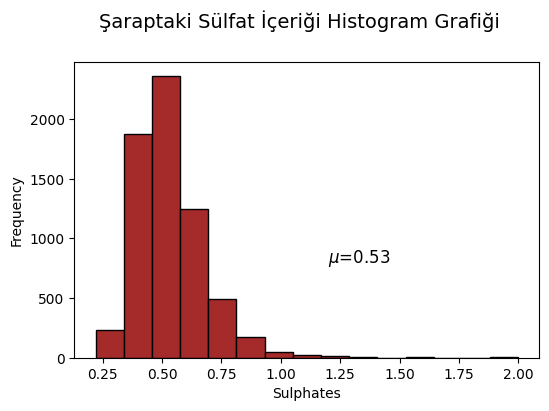

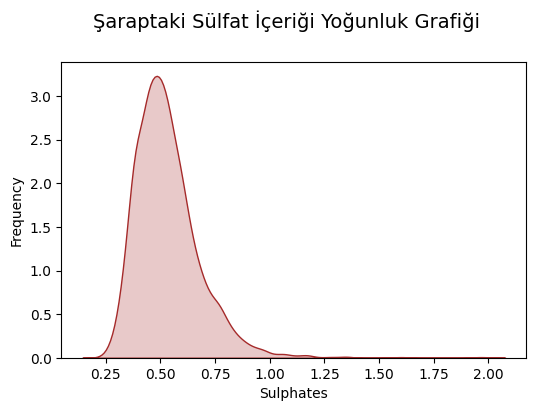

In [9]:
#Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Şaraptaki Sülfat İçeriği Histogram Grafiği", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)),
fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='brown', bins=15,
edgecolor='black', linewidth=1)


# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Şaraptaki Sülfat İçeriği Yoğunluk Grafiği", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='brown')

#Yorum olarak yoğunluk grafiğinde görüldüğü gibi grafik sağa çarpıktır.

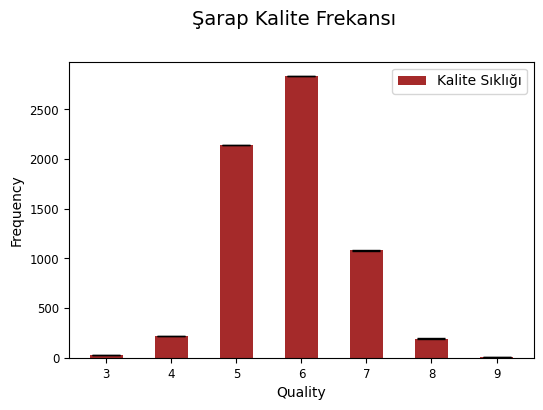

In [10]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Şarap Kalite Frekansı", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency")
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
#bar = ax.bar(w_q[0], w_q[1], color='brown',edgecolor='black', linewidth=1)



bar = plt.bar(w_q[0], w_q[1], width=0.5,
              color="brown", label="Kalite Sıklığı",
              yerr=0.5, ecolor="black", capsize=10)

plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.legend()

plt.show()


<ipython-input-11-abcf31de38bf>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wines.corr()


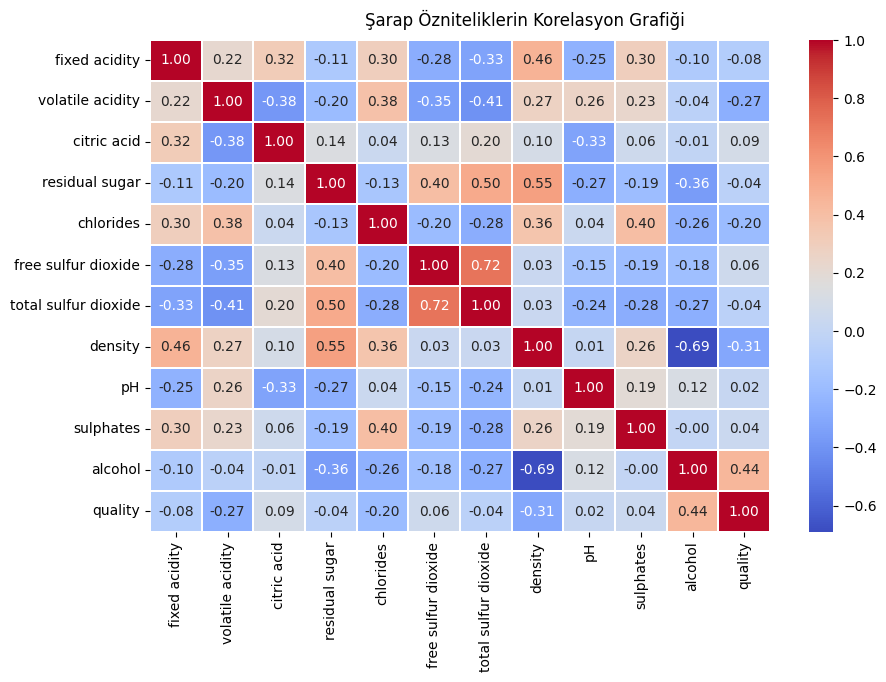

In [11]:
#Verileri İki Boyutta Görselleştirme (2-D)

#Korelasyon Matrisi ve Heatmap

f, ax =plt.subplots(figsize=(10,6))

corr = wines.corr()

hm= sns.heatmap(round(corr,2),annot = True, ax=ax, cmap ="coolwarm",fmt ='.2f',linewidths=.05)

f.subplots_adjust(top=0.93)
t=f.suptitle("Şarap Özniteliklerin Korelasyon Grafiği")


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/a

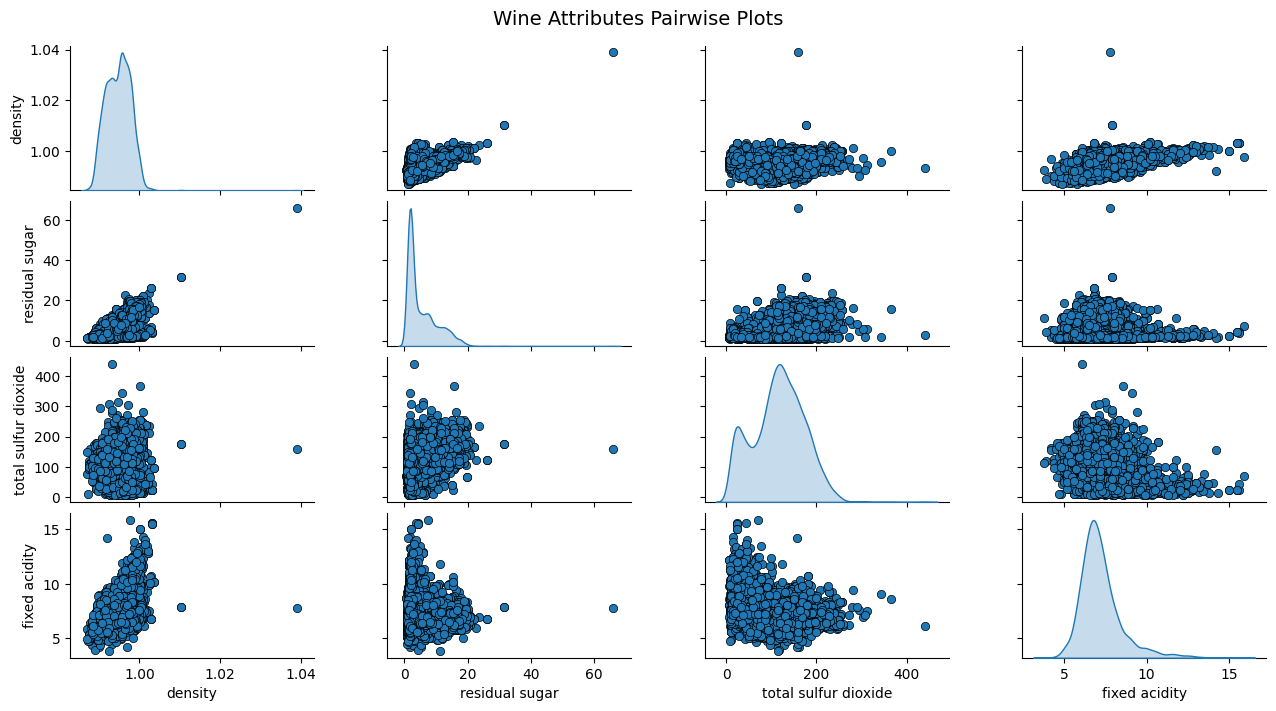

In [12]:
# İkili Dağılım Grafiği
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
plot_kws=dict(edgecolor="k", linewidth=0.5),
diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

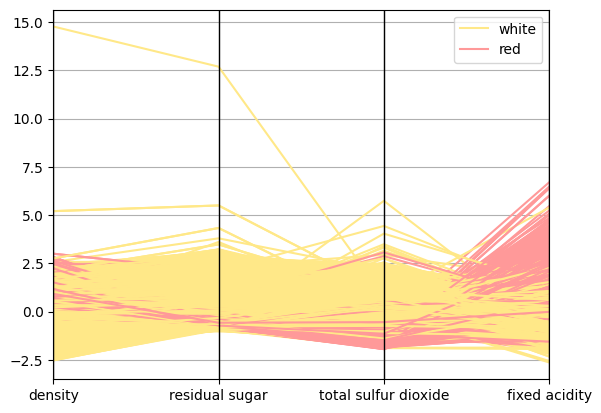

In [13]:
# Birkaç aykırı değerden kaçınmak için öznitelik değerlerini ölçeklendirme

cols = ['density','residual sugar', 'total sulfur dioxide','fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler

sd= StandardScaler()

scaled_df = sd.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df,columns = cols)
final_df =pd.concat([scaled_df,wines['wine_type']],axis = 1)
final_df.head()

#paralel kordinatlar grafiği

from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'wine_type',color = ('#FFE888', '#FF9999'))

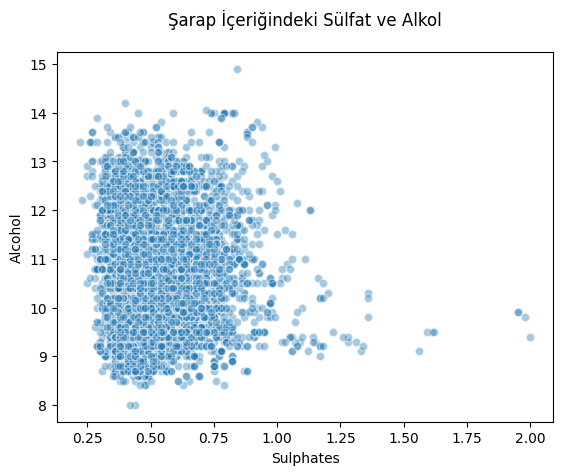

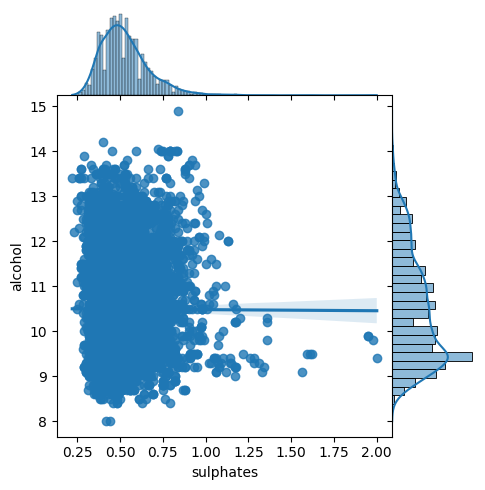

In [14]:
#Scatter PLot
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(wines['sulphates'], wines['alcohol'], alpha=0.4, edgecolor='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Şarap İçeriğindeki Sülfat ve Alkol', y=1.05)

jp = sns.jointplot(x='sulphates', y='alcohol', data=wines, kind="reg", space=0, height=5, ratio=4)

plt.show()



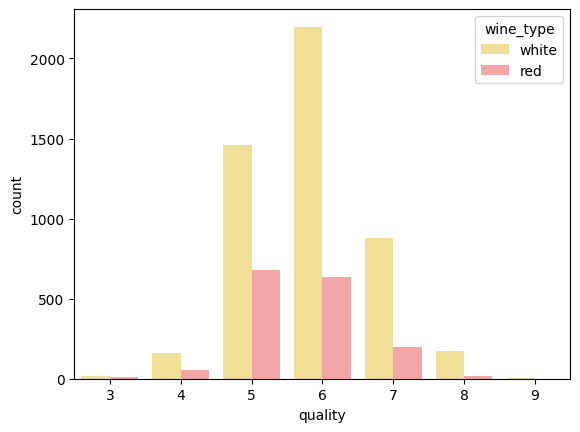

In [15]:
#Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines,
palette={"red": "#FF9999", "white": "#FFE888"})

Text(0, 0.5, 'Wine Alcohol %')

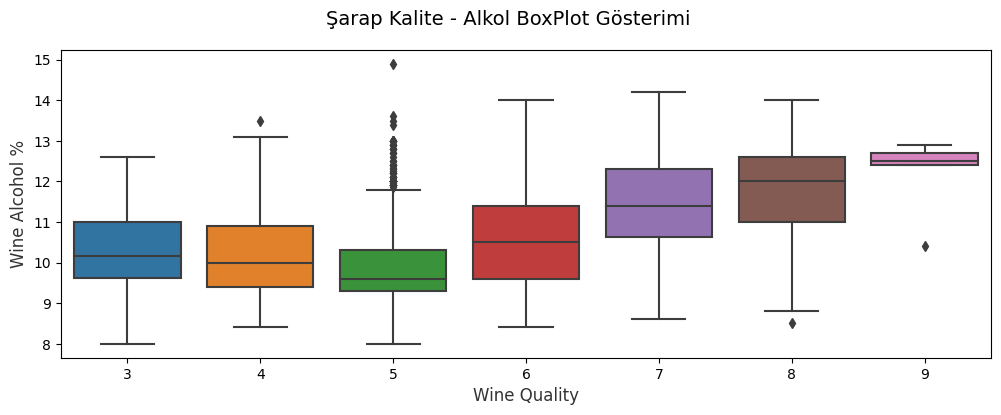

In [16]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Şarap Kalite - Alkol BoxPlot Gösterimi ', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,
ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Text(0.5, 0, 'Alcohol')

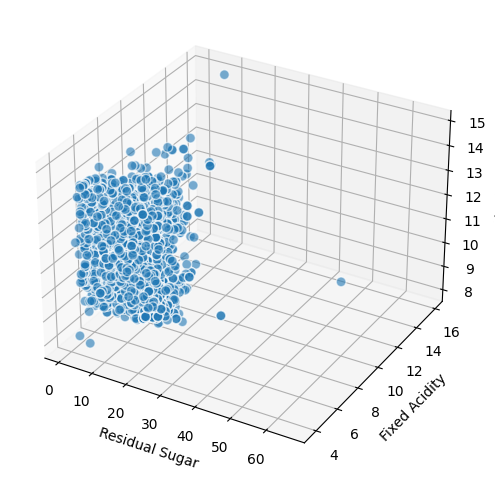

In [9]:
#Verileri Üç Boyutta Görselleştirme (3-D)

fig= plt.figure(figsize = (8,6))
ax= fig.add_subplot(111,projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')
